# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

<span style="color:lightblue"> My selected data is from the student milestone work [Auto Insurance Fraud Detection](https://docs.google.com/document/d/1bwvSn7k8ET3XHe37-JI5JSwVCRvUYxNv3ITZfGKXENM/edit?tab=t.0) and I have analyzed the [Car Claims](https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection) data set. 

<span style="color:lightblue"> **Who?** The "who" is the audience for my data science work. And in this case, I can see various segments of stakeholders:

1. **Auto insurance companies** - These stakeholders are the business leaders who need to discover fraud techniques by their customers and other claimants to create systems to prevent them. They also can benefit from systems that automate parts of the claims process like accident classification and repair estimates.

2. **Law enforcement** - These stakeholders can learn about how fraud is transacted so they can help stop fraud through smarter investigations and police work.

3. **Government and regulatory agencies** - Various entities that control the insurance industry and also governmental agencies related to widespread crimes, like fraud networks, etc.

4. **The general public and insurance policyholders** - They need to understand how fraud drives up their insurance payments and how these crimes are committed.


<span style="color:lightblue"> **What?** The "what" is fraud techniques and patterns that can be discovered in the data and used to either identify fraud quickly and investigate or predict situation where fraud could easily appear based on past occurrences. 

1. **Which claims are likely fraud?** - Are there details in a claim itself that indicate a high probability of fraud? 

2. **What patterns can indicate fraudulent claims from legitimate ones?** Could it be young drivers with very expensive cars? Could it be drivers who have recently changed address? 

3. **Which features are strong fraud indicators?** Is it Car Value? Could it be "driver-at-fault"? Could it be a new policy at accident time, because fraudsters open policies and commit fraud quickly?

<span style="color:lightblue"> **How?** The "how" is to isolate the collection of features that indicate fraud, write a paper on the discoveries including data samples and graphs, and also to isolate the best predictive model and describe it in this paper for public consumption. Among other concepts, it should cover: 

1. **What are the indicators of fraud and how to they interrelate?**

2. **How can machines be trained to notice possible fraud right at occurance?** 

3. **How could insurance company's data systems implement a fraud detection system - that scans feature sets and warns staff to investigate - both before possible fraud and right after occurrence?**



# 3. Homework - work with your own data

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [35]:
#get the data
car_claims = pd.read_csv(r"C:\Users\james\OneDrive\Documents\James at BU\Homework\699-ModB2-Spring\699 Datasets\carclaims.csv")
print("\nColumns:")

# I didn't like how the stats where getting truncated so I changed the display to a dataframe
column_info = pd.DataFrame({"Data Type": car_claims.dtypes})
column_info.index.name = "Column Name" #I named the index Column Name and removed Column Name from the columns so it looks better

# I added a sample value to the output - we have a problem with data types and stored values
# Many values that you would expect to be numbers are expressed in categorical terms, like Vehicle Price being "more than 69,000"
column_info["Example Value"] = car_claims.iloc[0].values

# Display the result
column_info



Columns:


,Data Type,Example Value
Column Name,,
Month,object,Dec
WeekOfMonth,int64,5
DayOfWeek,object,Wednesday
Make,object,Honda
AccidentArea,object,Urban
DayOfWeekClaimed,object,Tuesday
MonthClaimed,object,Jan
WeekOfMonthClaimed,int64,1
Sex,object,Female


In [36]:
#I think that only three features can realistically yield a mean, median, and mode so I'm going to limit the output to those three. 

print("\nSummary Statistics:")
columns_to_analyze = ["Age", "Deductible", "DriverRating"]

statistics = {
    "Statistic": ["Mean", "Median", "Mode"]
}

for col in columns_to_analyze:
    if col in car_claims.columns:
        statistics[col] = [
            car_claims[col].mean(), 
            car_claims[col].median(), 
            car_claims[col].mode()[0]  # Taking the first mode value
        ]

stats_df = pd.DataFrame(statistics)
print(stats_df)


Summary Statistics:
  Statistic        Age  Deductible  DriverRating
0      Mean  39.855707   407.70428      2.487808
1    Median  38.000000   400.00000      2.000000
2      Mode  30.000000   400.00000      1.000000


In [37]:

# There are no duplicate rows in the dataset
duplicate_rows = car_claims[car_claims.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")





Number of duplicate rows: 0


In [38]:
# There are no missing values in the dataset
null_values = car_claims.isnull().sum()

# let's filter out columns with no missing values
null_values = null_values[null_values > 0]

print(f"\nNumber of columns with missing values: {len(null_values)}")
print(null_values)


Number of columns with missing values: 0
Series([], dtype: int64)


In [39]:
# Define quality checks for the dataset
def quality_checks(df):
    errors = {}

    # 1. Check that Month and MonthClaimed are within Jan-Dec
    valid_months = {"Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"}
    
    if "Month" in df.columns:
        invalid_month = df[~df["Month"].isin(valid_months)]
        errors["Invalid Month"] = invalid_month.shape[0]

    if "MonthClaimed" in df.columns:
        invalid_month_claimed = df[~df["MonthClaimed"].isin(valid_months)]
        errors["Invalid MonthClaimed"] = invalid_month_claimed.shape[0]

    # 2. Check that DayOfWeek and DayOfWeekClaimed are Mon-Sun
    valid_days = {"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"}

    if "DayOfWeek" in df.columns:
        invalid_day = df[~df["DayOfWeek"].isin(valid_days)]
        errors["Invalid DayOfWeek"] = invalid_day.shape[0]

    if "DayOfWeekClaimed" in df.columns:
        invalid_day_claimed = df[~df["DayOfWeekClaimed"].isin(valid_days)]
        errors["Invalid DayOfWeekClaimed"] = invalid_day_claimed.shape[0]

    # 3. Check that WeekOfMonthClaimed is between 1-5
    if "WeekOfMonthClaimed" in df.columns:
        invalid_week = df[~df["WeekOfMonthClaimed"].between(1, 5)]
        errors["Invalid WeekOfMonthClaimed"] = invalid_week.shape[0]

    # 4. Check that Age is between 16 and 120
    if "Age" in df.columns:
        invalid_age = df[~df["Age"].between(16, 120)]
        errors["Invalid Age"] = invalid_age.shape[0]

    # 5. Check that Year is between 1994 and 1996 - this is the date range of the dataset
    if "Year" in df.columns:
        invalid_year = df[~df["Year"].between(1994, 1996)]
        errors["Invalid Year"] = invalid_year.shape[0]

    return errors

# Run the quality checks
quality_issues = quality_checks(car_claims)

# Display the results
quality_issues


{'Invalid Month': 0,
 'Invalid MonthClaimed': 1,
 'Invalid DayOfWeek': 0,
 'Invalid DayOfWeekClaimed': 1,
 'Invalid WeekOfMonthClaimed': 0,
 'Invalid Age': 320,
 'Invalid Year': 0}

In [40]:
#We find out that non-recorded Ages is listed as 0. We know this because the counted values outside of our acceptable range is 320 which is the exact number of 0 values in the Age column.
zero_age_count = (car_claims["Age"] == 0).sum()
print(f"Number of occurrences where 'Age' is zero: {zero_age_count}")

Number of occurrences where 'Age' is zero: 320


In [41]:
# We also find out that MonthClaimed and DayOFWeekClaimed have invalid entries and these are zero
valid_months = {"Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"}
valid_days = {"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"}

# Find invalid entries for MonthClaimed
invalid_month_claimed = car_claims[~car_claims["MonthClaimed"].isin(valid_months)]["MonthClaimed"].unique()

# Find invalid entries for DayOfWeekClaimed
invalid_day_claimed = car_claims[~car_claims["DayOfWeekClaimed"].isin(valid_days)]["DayOfWeekClaimed"].unique()

# Output the invalid entries
print("Invalid entries in 'MonthClaimed':", invalid_month_claimed)
print("Invalid entries in 'DayOfWeekClaimed':", invalid_day_claimed)


Invalid entries in 'MonthClaimed': ['0']
Invalid entries in 'DayOfWeekClaimed': ['0']


In [42]:
#there is only one record where the value is 0 and it's the same record
valid_months = {"Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"}
valid_days = {"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"}

# Find and count invalid entries for MonthClaimed
invalid_month_count = car_claims[~car_claims["MonthClaimed"].isin(valid_months)]["MonthClaimed"].count()

# Find and count invalid entries for DayOfWeekClaimed
invalid_day_count = car_claims[~car_claims["DayOfWeekClaimed"].isin(valid_days)]["DayOfWeekClaimed"].count()

# Output the number of invalid entries
print("Number of invalid entries in 'MonthClaimed':", invalid_month_count)
print("Number of invalid entries in 'DayOfWeekClaimed':", invalid_day_count)


Number of invalid entries in 'MonthClaimed': 1
Number of invalid entries in 'DayOfWeekClaimed': 1


In [43]:
#let's check for class imbalance by checking the number of unqiue values in all columns
unique_values_count = car_claims.nunique()

# Convert to a DataFrame for better readability
unique_values_df = pd.DataFrame(unique_values_count, columns=["Unique Value Count"])

# Display the result
unique_values_df

,Unique Value Count
Column Name,
Month,12
WeekOfMonth,5
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
WeekOfMonthClaimed,5
Sex,2


<span style="color:lightblue"> **Fix List** After doing our quality checks, this is what we need to do to clean and prepare the dataset.

1. Remove PolicyNumber - it's a unique identifier and we don't need it

2. Remove zeros from Age by imputing with the mean

3. Find and Remove the zeros from MonthClaimed and DayOfWeekClaimed by imputing with mode

4. a: Remove none from ordered categories and b: perform ordinal encoding

5. One hot encode the categorical variables

6. Binary encode the Yes/No variables



In [44]:
#1. Remove PolicyNumber - it's a unique identifier and we don't need it

#drop the column
car_claims_clean1 = car_claims.drop(columns=["PolicyNumber"])

#chec if PolicyNumber is still in the dataset - True if exists, False if no. We want False.
print("PolicyNumber" in car_claims_clean1.columns)


False


In [45]:
#2. Remove zeros from Age by imputing with the mean

#create a copy of the DataFrame
car_claims_clean2 = car_claims_clean1.copy()

#get mean of age column excluding zeros
mean_age = car_claims_clean2.loc[car_claims_clean2["Age"] != 0, "Age"].mean()

#replace zeros with the mean for all zero ages
car_claims_clean2["Age"] = car_claims_clean2["Age"].replace(0, mean_age)

#check that all zero ages have been removed
clean2_zero_count = (car_claims_clean2["Age"] == 0).sum()
print(clean2_zero_count)



0


In [46]:
#3. Find and Remove the zeros from MonthClaimed and DayOfWeekClaimed by imputing with mode

#create a copy of the DataFrame
car_claims_clean3 = car_claims_clean2.copy()

#compute the mode for each column
month_mode = car_claims_clean3["MonthClaimed"].mode()[0]
day_mode = car_claims_clean3["DayOfWeekClaimed"].mode()[0]

#replace zeros with the mode
car_claims_clean3["MonthClaimed"] = car_claims_clean3["MonthClaimed"].replace(0, month_mode)
car_claims_clean3["DayOfWeekClaimed"] = car_claims_clean3["DayOfWeekClaimed"].replace(0, day_mode)

#check that all zeros have been removed
clean3_zero_count = (car_claims_clean3["MonthClaimed"] == 0).sum() + (car_claims_clean3["DayOfWeekClaimed"] == 0).sum()
print(clean3_zero_count)


0


In [47]:
#4a: remove none from ordered categories 

#create a copy of the DataFrame
car_claims_clean4a = car_claims_clean3.copy()

#do the replacements
car_claims_clean4a["Days:Policy-Accident"] = car_claims_clean4a["Days:Policy-Accident"].replace(
    "none", car_claims_clean4a["Days:Policy-Accident"].mode()[0]
)

car_claims_clean4a["Days:Policy-Claim"] = car_claims_clean4a["Days:Policy-Claim"].replace(
    "none", car_claims_clean4a["Days:Policy-Claim"].mode()[0]
)

#check that all none's have been removed
clearn4a_none_counts = {
    "Days:Policy-Accident": (car_claims_clean4a["Days:Policy-Accident"] == "none").sum(),
    "Days:Policy-Claim": (car_claims_clean4a["Days:Policy-Claim"] == "none").sum()
}

print(clearn4a_none_counts)

{'Days:Policy-Accident': np.int64(0), 'Days:Policy-Claim': np.int64(0)}


In [48]:
#4b. Ordinal encode the ordered categories

from sklearn.preprocessing import OrdinalEncoder

#create a copy of the DataFrame
car_claims_clean4b = car_claims_clean4a.copy()

ordinal_mappings = {
    "VehiclePrice": ["less than 20,000", "20,000 to 29,000", "30,000 to 39,000", "40,000 to 59,000", "60,000 to 69,000", "more than 69,000"],
    "Days:Policy-Accident": ["1 to 7", "8 to 15", "15 to 30", "more than 30"],
    "Days:Policy-Claim": ["8 to 15", "15 to 30", "more than 30"],
    "AgeOfVehicle": ["new", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "more than 7"],
    "AgeOfPolicyHolder": ["16 to 17", "18 to 20", "21 to 25", "26 to 30", "31 to 35", "36 to 40", "41 to 50", "51 to 65", "over 65"],
    "AddressChange-Claim": ["no change", "under 6 months", "1 year", "2 to 3 years", "4 to 8 years"],
    "NumberOfCars": ["1 vehicle", "2 vehicles", "3 to 4", "5 to 8", "more than 8"]
}

#define the ordinal encoder with the mappings
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_mappings])

#apply ordinal encoding
car_claims_clean4b[list(ordinal_mappings.keys())] = ordinal_encoder.fit_transform(
    car_claims_clean4b[list(ordinal_mappings.keys())]
)

#check transformation
transformed_columns = list(ordinal_mappings.keys())
car_claims_clean4b[transformed_columns].head()

Column Name,VehiclePrice,Days:Policy-Accident,Days:Policy-Claim,AgeOfVehicle,AgeOfPolicyHolder,AddressChange-Claim,NumberOfCars
0,5.0,3.0,2.0,2.0,3.0,2.0,2.0
1,5.0,3.0,2.0,5.0,4.0,0.0,0.0
2,5.0,3.0,2.0,6.0,6.0,0.0,0.0
3,1.0,3.0,2.0,7.0,7.0,0.0,0.0
4,5.0,3.0,2.0,4.0,4.0,0.0,0.0


In [49]:
#5. One hot encode the categorical variables

#create a copy of the DataFrame
car_claims_clean5 = car_claims_clean4b.copy()

#set the columns to one hot encode
one_hot_columns = ["Month", "DayOfWeek", "Make", "AccidentArea", "MonthClaimed", "DayOfWeekClaimed", 
                   "PolicyType", "VehicleCategory", "BasePolicy", "Sex", "MaritalStatus", "Fault", "AgentType"]

#apply one hot encoding
car_claims_clean5 = pd.get_dummies(car_claims_clean5, columns=one_hot_columns, drop_first=True)


#check transformation
one_hot_encoded_cols = [col for col in car_claims_clean5.columns if any(base_col in col for base_col in one_hot_columns)]
print(car_claims_clean5[one_hot_encoded_cols].head())

   WeekOfMonth  WeekOfMonthClaimed  Month_Aug  Month_Dec  Month_Feb  \
0            5                   1      False       True      False   
1            3                   4      False      False      False   
2            5                   2      False      False      False   
3            2                   1      False      False      False   
4            5                   2      False      False      False   

   Month_Jan  Month_Jul  Month_Jun  Month_Mar  Month_May  ...  \
0      False      False      False      False      False  ...   
1       True      False      False      False      False  ...   
2      False      False      False      False      False  ...   
3      False      False       True      False      False  ...   
4       True      False      False      False      False  ...   

   VehicleCategory_Sport  VehicleCategory_Utility  BasePolicy_Collision  \
0                   True                    False                 False   
1                   True        

In [50]:
#6. Binary encode the Yes/No variables

#create a copy of the DataFrame
car_claims_clean6 = car_claims_clean5.copy()

#do binary encoding
binary_columns = ["PoliceReportFiled", "WitnessPresent", "FraudFound"]
car_claims_clean6[binary_columns] = car_claims_clean6[binary_columns].apply(lambda x: x.map({"Yes": 1, "No": 0}))

#check transformation
print(car_claims_clean6[binary_columns].head())

   PoliceReportFiled  WitnessPresent  FraudFound
0                  0               0           0
1                  1               0           0
2                  0               0           0
3                  1               0           0
4                  0               0           0


<span style="color:lightblue"> **Conclusions**

1. Yes, this data is usable and appropriate for finding patters in car claim fraud and for creating a predictive model

2. Yes, the dataset needed clearning and preparation and I feel I have done it.

3. No, I don't think there is severe class imbalance in the features. It's true there is Month/Day lists but I think these are useful for our data. If I discover a problem with them during further analysis, I can look into advanced encoding techniques for these time-based data (frequency encoding, cyclical encoding, etc.) or I could investigate dropping Month and Day of the Month if that data doesn't prove useful to my modeling. For now, I want to continue with them as I have currently transformed them. 



# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

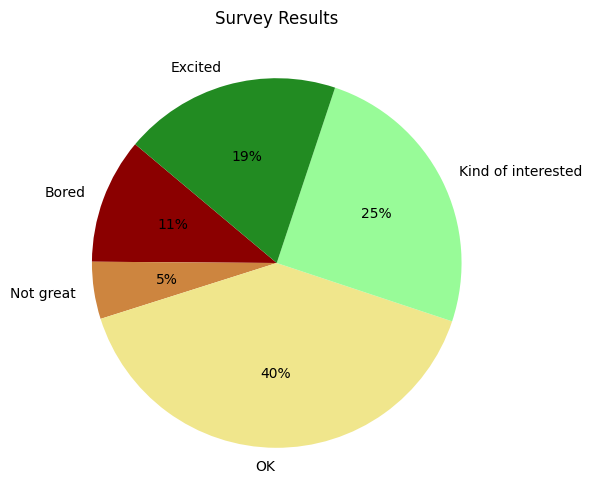

In [51]:
#I confess I chose a simple example. 

import matplotlib.pyplot as plt

#create labels and sizes, use colors to show intrest spectrum - if it exists..
labels = ["Bored", "Not great", "OK", "Kind of interested", "Excited"]
sizes = [11, 5, 40, 25, 19]
colors = ["darkred", "peru", "khaki", "palegreen", "forestgreen"]

#make the pie
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors=colors, startangle=140)
plt.title("Survey Results")
plt.show()